In [ ]:
# This code needs to exist in every notebook that imports functions from another file so that it will automatically check for changes in that file and update cached versions. 
%load_ext autoreload
%autoreload 2

In [ ]:
from process_data import process_all_data

# Get fresh DataFrames
df_main, df_filtered, df_cbf, df_cbf_logical, df_filtered_logical, df_filtered_forCN, df_filtered_forMCI, df_filtered_forRecovery = process_all_data()

Loaded ADNIMERGE_27Jan2025.csv: 16421 rows, 116 columns
Loaded ADNIMERGE_DICT_27Jan2025.csv: 113 rows, 33 columns
Loaded ADNI_PICSLASHS_02_15_22_27Jan2025.csv: 1978 rows, 58 columns
Loaded ADNI_PICSL_ASHS_27Jan2025.csv: 2284 rows, 67 columns
Loaded DESIKANLAB_27Jan2025.csv: 1520 rows, 5 columns
Loaded UCSFSNTVOL_27Jan2025.csv: 1874 rows, 15 columns
About to call add_progression_column
Ran add_progression_column
Excluded Chaotic progression


In [16]:
# Prep for figures
# Import necessary libraries
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

# Set up the figure directory
figure_dir = r'C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ADNI_take2\figures'
# Function to save figures
def save_figure(filename):
    """Save figure to the specified directory"""
    filepath = os.path.join(figure_dir, filename)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f"Saved figure to: {filepath}")


Summary statistics for Hippocampus by diagnosis:
           count         mean          std     min      25%     50%      75%  \
DX                                                                             
CN        2603.0  7379.387361   915.727802  4237.9  6774.95  7413.0  7945.00   
Dementia  1491.0  5575.313347  1086.117031  2219.0  4760.00  5506.0  6266.15   
MCI       3069.0  6761.263213  1139.478760  2822.0  5960.00  6803.0  7535.00   

              max  
DX                 
CN        11207.0  
Dementia   9908.0  
MCI       10452.0  
Saved figure to: C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ADNI_take2\figures\ADNI_HippocampusbyDX_HIST.png


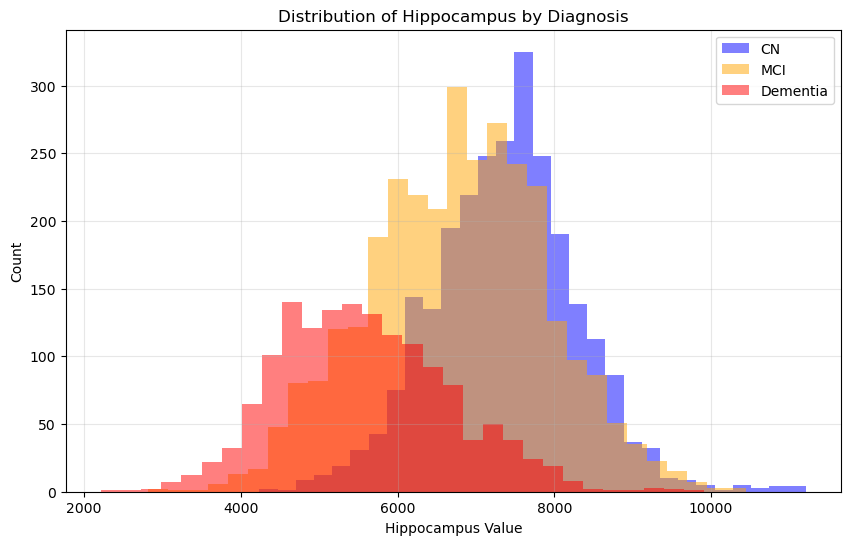


Summary statistics for VOL_LEFTHIPPO by diagnosis:
          count         mean         std       min        25%      50%  \
DX                                                                       
CN        313.0  2139.460895  302.345028  1379.220  1908.0000  2129.64   
Dementia  367.0  1531.671910  324.778494   844.717  1283.9750  1487.64   
MCI       496.0  1789.266411  359.285244   816.761  1553.9575  1783.59   

               75%      max  
DX                           
CN        2357.220  2858.74  
Dementia  1741.685  2499.88  
MCI       2001.805  2767.22  
Saved figure to: C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ADNI_take2\figures\ADNI_VOL_LEFTHIPPObyDX_HIST.png


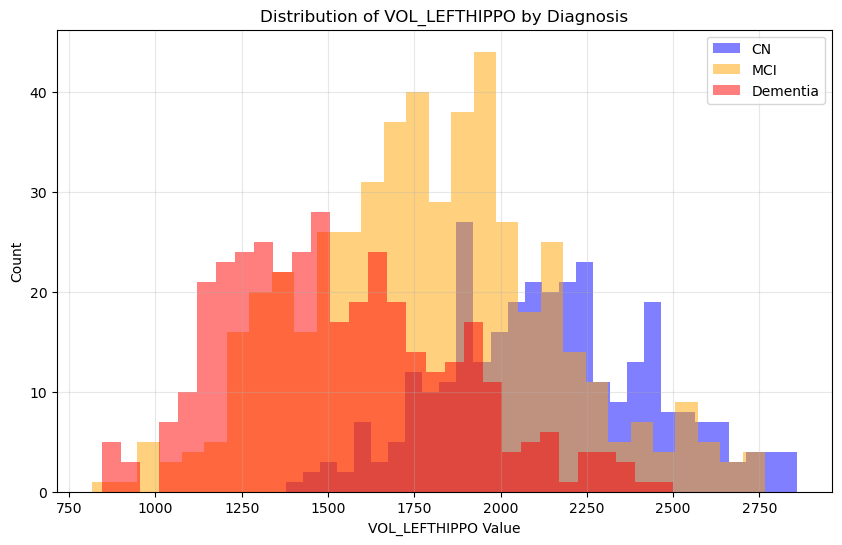


Summary statistics for VOL_RIGHTHIPPO by diagnosis:
          count         mean         std       min       25%       50%  \
DX                                                                       
CN        313.0  2180.244696  318.057134  1297.330  1963.110  2179.900   
Dementia  367.0  1587.468518  362.482916   592.838  1351.135  1525.090   
MCI       496.0  1842.038808  378.649266   832.283  1590.595  1848.345   

              75%      max  
DX                          
CN        2385.59  3077.68  
Dementia  1800.84  2793.10  
MCI       2087.23  2841.49  
Saved figure to: C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ADNI_take2\figures\ADNI_VOL_RIGHTHIPPObyDX_HIST.png


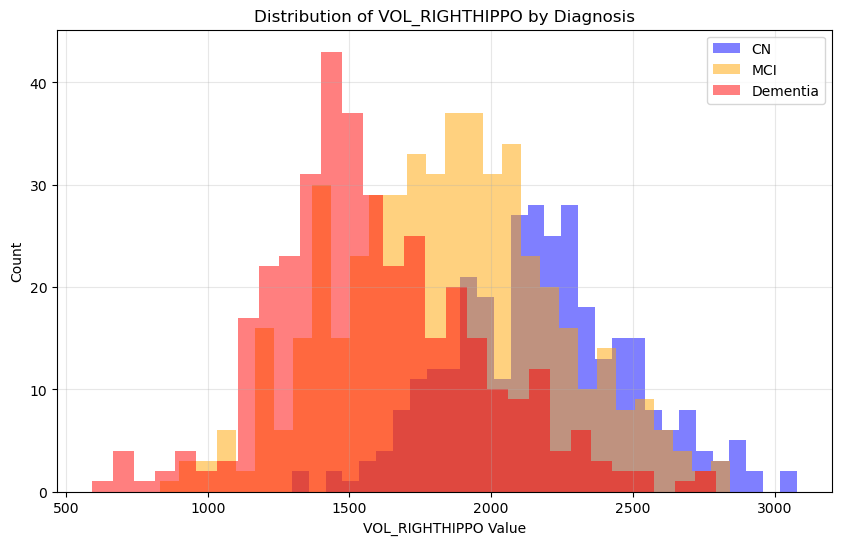


Summary statistics for Gen_PHS by diagnosis:
           count      mean       std      min       25%       50%       75%  \
DX                                                                            
CN        2377.0  0.005406  0.626329 -1.23981 -0.408082 -0.149644  0.377419   
Dementia  1810.0  0.798588  0.815567 -1.17686  0.139214  0.782207  1.321440   
MCI       3335.0  0.388210  0.789345 -1.17686 -0.225478  0.174017  0.956307   

              max  
DX                 
CN        2.82023  
Dementia  2.62538  
MCI       2.93680  
Saved figure to: C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ADNI_take2\figures\ADNI_Gen_PHSbyDX_HIST.png


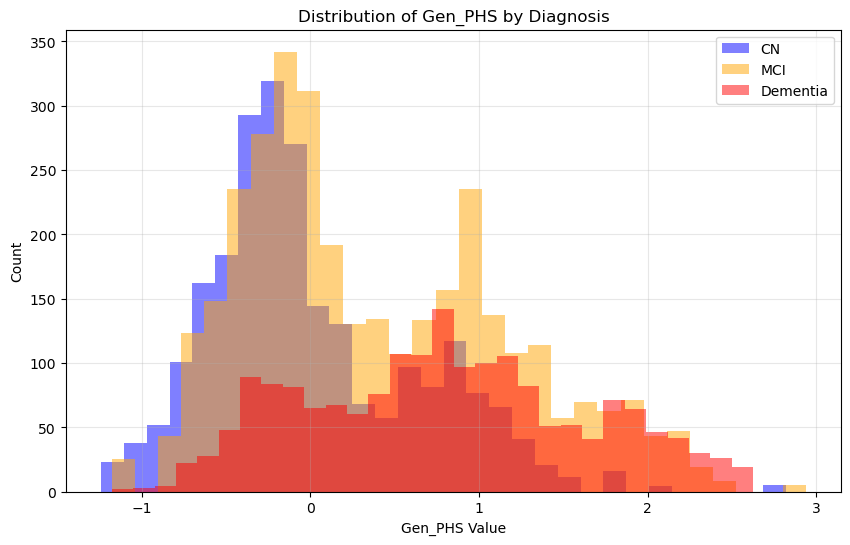

In [47]:
def plot_distribution_by_diagnosis(df_filtered, data_column):
    """
    Create a histogram showing the distribution of a specified data column
    across different diagnosis groups.
    
    Parameters:
    -----------
    df_filtered : pandas.DataFrame
        The dataframe containing the diagnosis and data column
    data_column : str
        The name of the column to plot (e.g., 'Hippocampus')
    """
    # Create figure with larger size
    plt.figure(figsize=(10, 6))
    
    # Specify the order we want
    diagnosis_order = ['CN', 'MCI', 'Dementia']
    colors = ['blue', 'orange', 'red']
    
    # Create histogram for each diagnosis in our specified order
    for dx, color in zip(diagnosis_order, colors):
        subset = df_filtered[df_filtered['DX'] == dx]
        # Skip empty subsets
        if len(subset) > 0:
            plt.hist(subset[data_column].dropna(), alpha=0.5, label=dx, color=color, bins=30)
    
    # Customize the plot
    plt.xlabel(f'{data_column} Value')
    plt.ylabel('Count')
    plt.title(f'Distribution of {data_column} by Diagnosis')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Print some summary statistics
    print(f"\nSummary statistics for {data_column} by diagnosis:")
    print(df_filtered.groupby('DX')[data_column].describe())
    
    # Save the figure with dynamic filename
    filename = f'ADNI_{data_column}byDX_HIST.png'
    save_figure(filename)
    
    # Show the plot
    plt.show()

# Example usage:
plot_distribution_by_diagnosis(df_filtered, 'Hippocampus')
plot_distribution_by_diagnosis(df_filtered, 'VOL_LEFTHIPPO')
plot_distribution_by_diagnosis(df_filtered, 'VOL_RIGHTHIPPO')
# Gen_PHS
plot_distribution_by_diagnosis(df_filtered, 'Gen_PHS')

Saved figure to: C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ADNI_take2\figures\ADNI_HippocampusbyDX_POINT_SEM.png


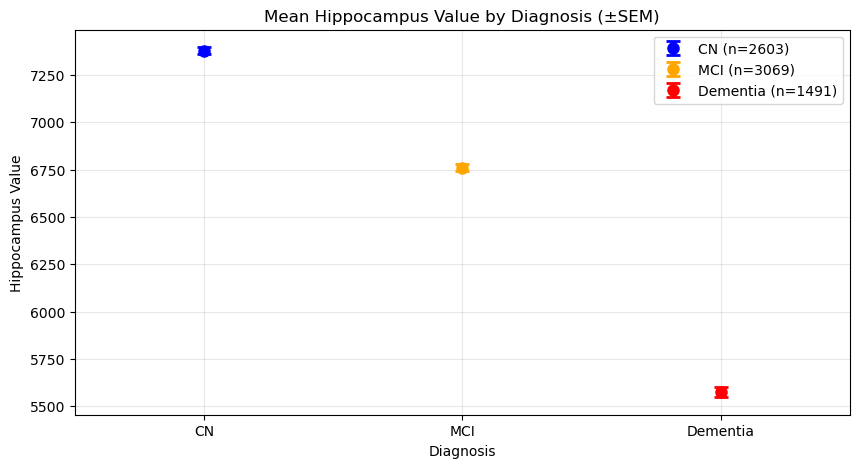


Summary statistics for Hippocampus:

CN (n=2603):
Mean: 7379.39
SEM: 17.95
SD: 915.73

MCI (n=3069):
Mean: 6761.26
SEM: 20.57
SD: 1139.48

Dementia (n=1491):
Mean: 5575.31
SEM: 28.13
SD: 1086.12
Saved figure to: C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ADNI_take2\figures\ADNI_Gen_PHSbyDX_POINT_SEM.png


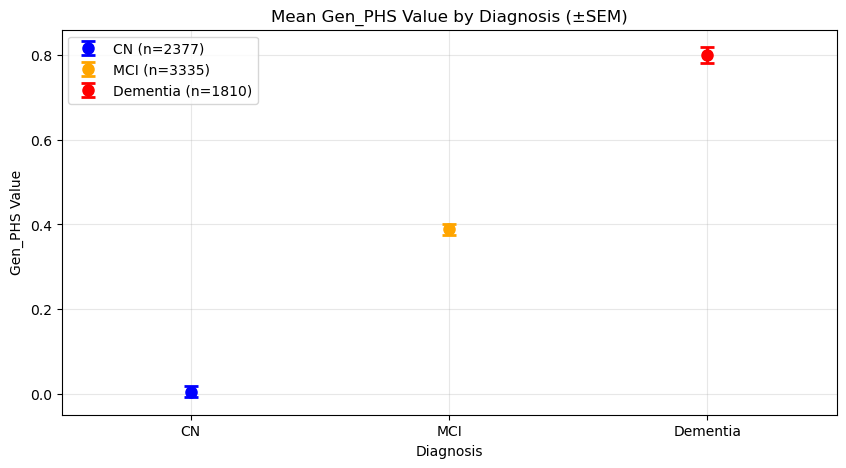


Summary statistics for Gen_PHS:

CN (n=2377):
Mean: 0.01
SEM: 0.01
SD: 0.63

MCI (n=3335):
Mean: 0.39
SEM: 0.01
SD: 0.79

Dementia (n=1810):
Mean: 0.80
SEM: 0.02
SD: 0.82


In [46]:
def plot_diagnosis_comparison(df_filtered, data_column, error_type='std'):
    """
    Create a point plot with error bars showing the mean values of a specified data column
    across different diagnosis groups.
    
    Parameters:
    -----------
    df_filtered : pandas.DataFrame
        The dataframe containing the diagnosis and data column
    data_column : str
        The name of the column to plot (e.g., 'Hippocampus')
    error_type : str, optional
        Type of error to display, either 'std' for standard deviation or 'sem' for standard error
        Default is 'std'
    """
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Specify order and colors
    diagnosis_order = ['CN', 'MCI', 'Dementia']
    colors = ['blue', 'orange', 'red']

    # Calculate means and errors for each group
    stats = []
    for dx in diagnosis_order:
        subset = df_filtered[df_filtered['DX'] == dx]
        values = subset[data_column].dropna()  # Handle NaN values
        
        # Only calculate statistics if we have data
        if len(values) > 0:
            mean = values.mean()
            std = values.std()
            sem = std / np.sqrt(len(values))
            stats.append({
                'dx': dx, 
                'mean': mean, 
                'sem': sem,
                'std': std,
                'n': len(values)
            })
        else:
            stats.append({
                'dx': dx, 
                'mean': np.nan, 
                'sem': np.nan,
                'std': np.nan,
                'n': 0
            })

    # Create figure
    plt.figure(figsize=(10, 5))

    # Plot points and error bars
    x = range(len(diagnosis_order))
    means = [s['mean'] for s in stats]
    errors = [s[error_type] for s in stats]

    for i, (dx, color) in enumerate(zip(diagnosis_order, colors)):
        if not np.isnan(means[i]):
            plt.errorbar(i, means[i], yerr=errors[i], fmt='o', capsize=5, capthick=2, 
                        markersize=8, elinewidth=2, color=color, label=f"{dx} (n={stats[i]['n']})")

    # Customize the plot
    plt.xticks(x, diagnosis_order)
    plt.xlabel('Diagnosis')
    plt.ylabel(f'{data_column} Value')
    error_label = 'SEM' if error_type == 'sem' else 'SD'
    plt.title(f'Mean {data_column} Value by Diagnosis (±{error_label})')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xlim(-0.5, len(diagnosis_order) - 0.5)

    # Save with dynamic filename
    error_label = 'STD' if error_type == 'std' else 'SEM'
    filename = f'ADNI_{data_column}byDX_POINT_{error_label}.png'
    save_figure(filename)  # Assuming save_figure function exists

    plt.show()

    # Print the numerical values
    print(f"\nSummary statistics for {data_column}:")
    for s in stats:
        if s['n'] > 0:
            print(f"\n{s['dx']} (n={s['n']}):")
            print(f"Mean: {s['mean']:.2f}")
            print(f"SEM: {s['sem']:.2f}")
            print(f"SD: {s['std']:.2f}")
        else:
            print(f"\n{s['dx']}: No valid data")

# Example usage:
plot_diagnosis_comparison(df_filtered, 'Hippocampus', error_type='sem')
plot_diagnosis_comparison(df_filtered, 'Gen_PHS', error_type='sem')



Saved figure to: C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ADNI_take2\figures\ADNI_HippocampusbyVOL_LEFTHIPPODX_SCATTER.png
Saved figure to: C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ADNI_take2\figures\ADNI_HippocampusbyVOL_RIGHTHIPPODX_SCATTER.png
Saved figure to: C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ADNI_take2\figures\ADNI_HippocampusbyGen_PHSDX_SCATTER.png
Saved figure to: C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ADNI_take2\figures\ADNI_HippocampusbyGen_CIRDX_SCATTER.png
Saved figure to: C:\Users\Sarah\Dropbox\Bearah Bace\PythonProjects\ADNI_take2\figures\ADNI_HippocampusbyAGEDX_SCATTER.png


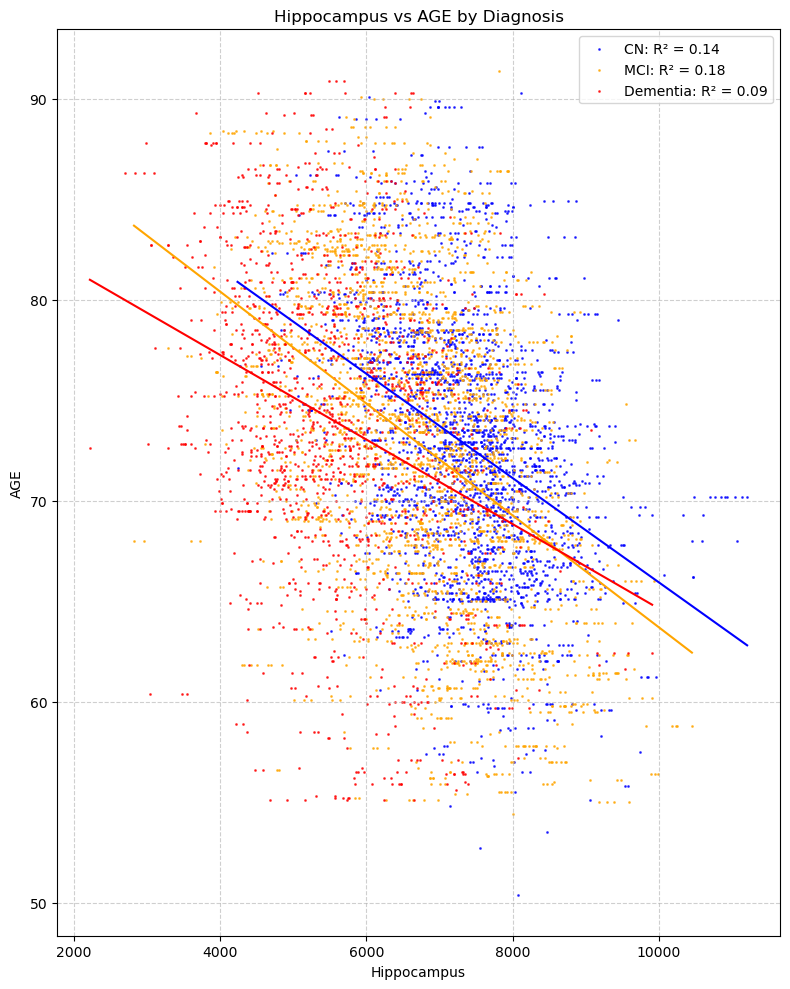

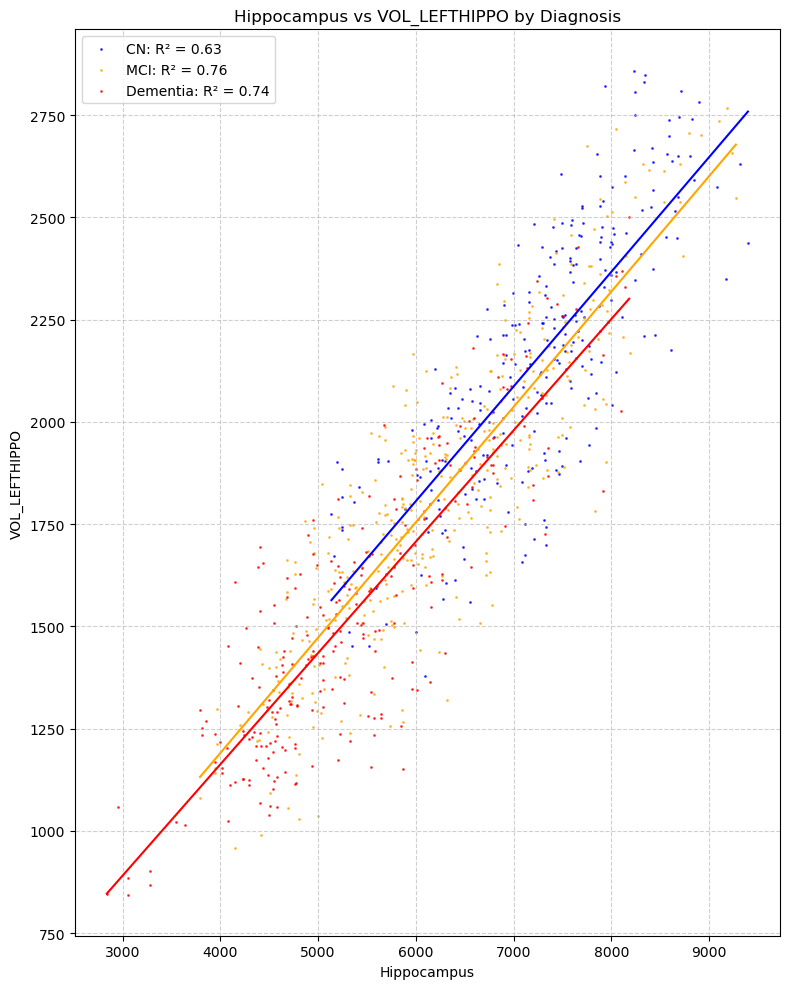

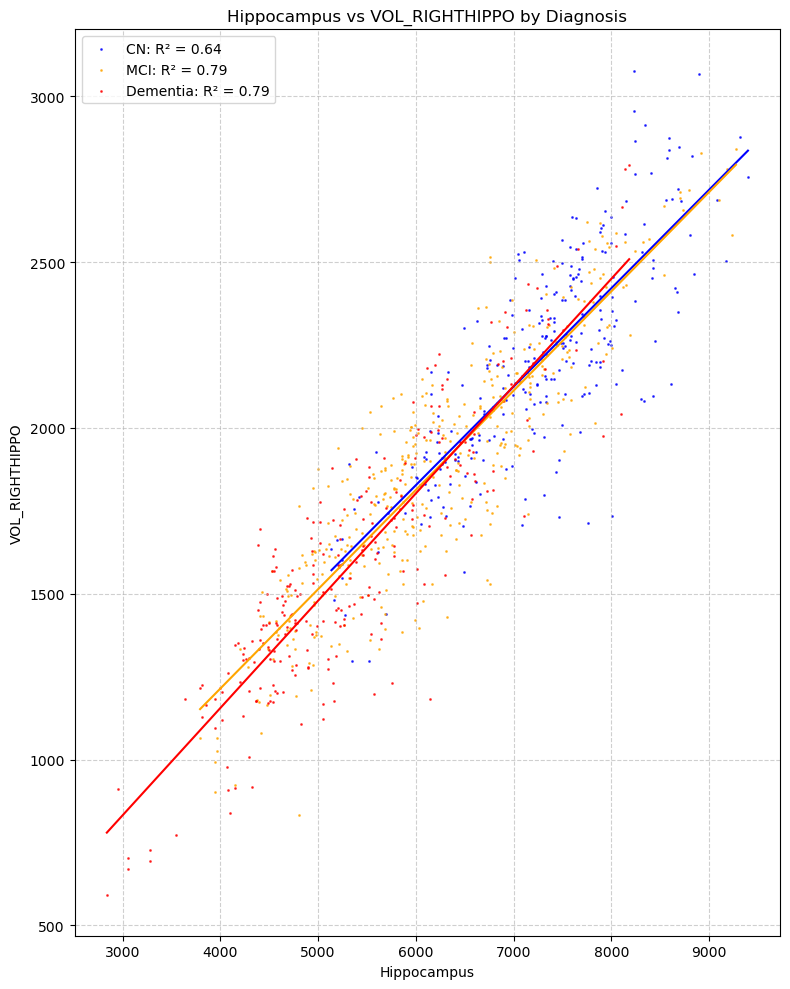

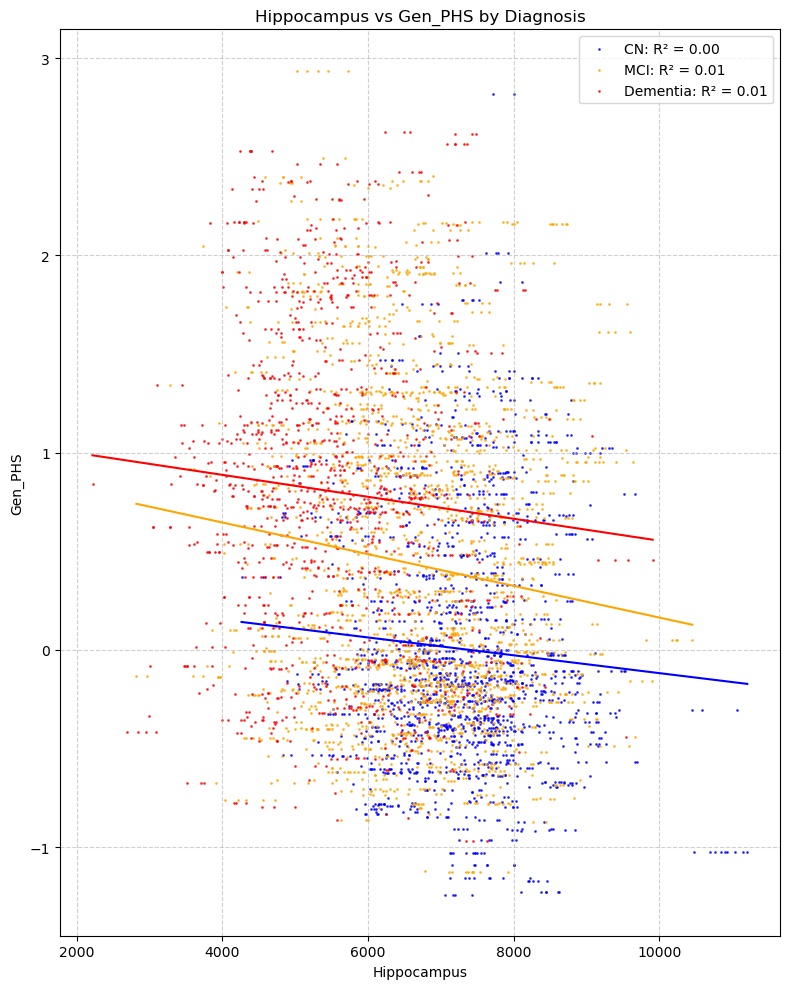

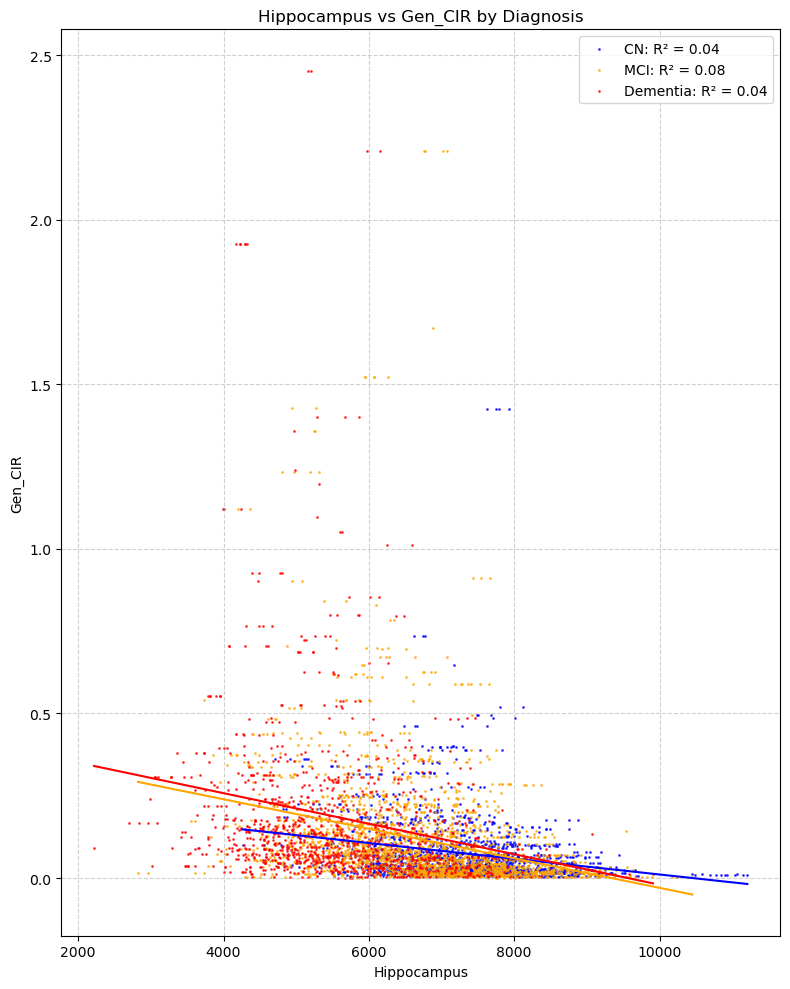

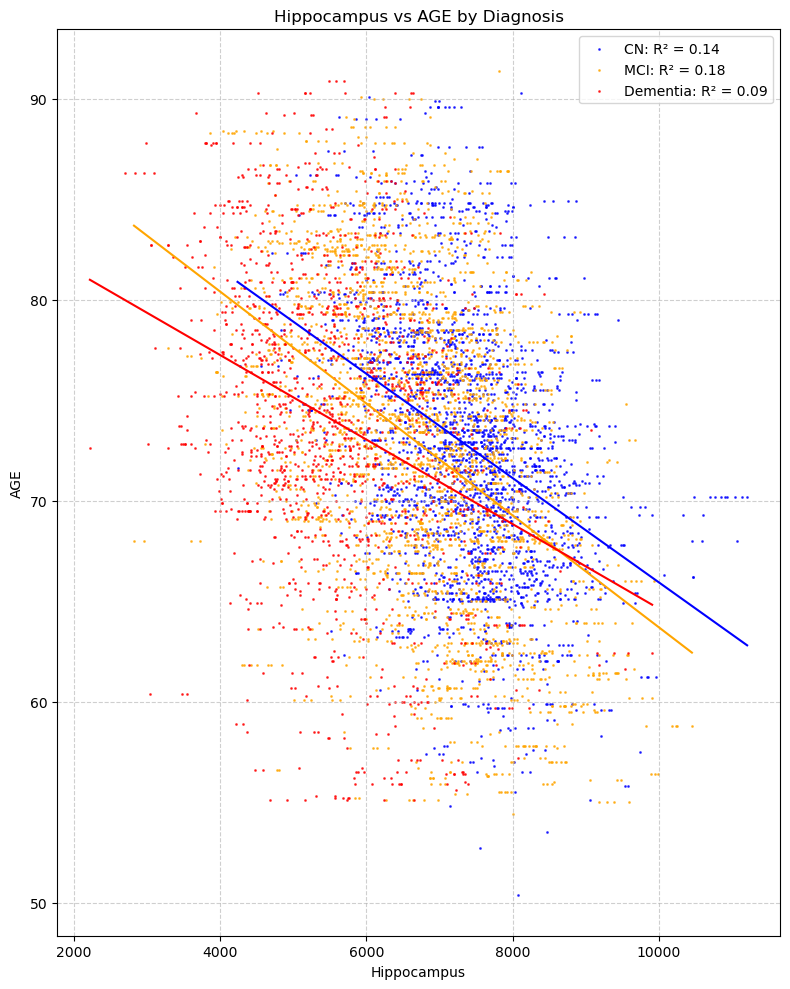

In [6]:
#plot scatter plots with trend lines and stats

# Plot CBF vs brain atrophy scatter plots with trend lines and statistics
def plot_correlation_by_diagnosis(df_filtered, data_column1, data_column2):
    # Set data columns
    data_column1 = data_column1
    data_column2 = data_column2

    # Specify order and colors
    diagnosis_order = ['CN', 'MCI', 'Dementia']
    colors = ['blue', 'orange', 'red']

    # Create figure
    fig, ax = plt.figure(figsize=(8, 10)), plt.gca()

    # Track legend elements and labels
    legend_elements = []
    legend_labels = []

    # Scatterplot by diagnosis with trend lines and statistics
    for i, dx in enumerate(diagnosis_order):
        subset = df_filtered[df_filtered['DX'] == dx]
        
        # Extract values and handle NaN values by using dropna
        valid_data = subset[[data_column1, data_column2]].dropna()
        
        # Only proceed if we have enough valid data points
        if len(valid_data) > 1:  # Need at least 2 points for regression
            values1 = valid_data[data_column1]
            values2 = valid_data[data_column2]
            
            # Plot scatter points with small size (s=1)
            scatter = ax.scatter(values1, values2, color=colors[i], alpha=0.7, s=1)
            legend_elements.append(scatter)
            
            # Calculate linear regression
            slope, intercept, r_value, p_value, std_err = stats.linregress(values1, values2)
            r_squared = r_value**2
            
            # Add trend line
            x_range = np.linspace(min(values1), max(values1), 100)
            y_pred = slope * x_range + intercept
            line = ax.plot(x_range, y_pred, color=colors[i], linestyle='-')
            
            # Create simplified label with only R² value
            label = f"{dx}: R² = {r_squared:.2f}"
            legend_labels.append(label)
        elif len(valid_data) == 1:
            # If only one valid point, just plot it without regression
            values1 = valid_data[data_column1]
            values2 = valid_data[data_column2]
            scatter = ax.scatter(values1, values2, color=colors[i], alpha=0.7, s=1)
            legend_elements.append(scatter)
            label = f"{dx}: insufficient data"
            legend_labels.append(label)
        else:
            # No valid data points for this diagnosis
            label = f"{dx}: no valid data"
            legend_labels.append(plt.Line2D([0], [0], marker='o', color='w', 
                                          markerfacecolor=colors[i], markersize=8))

    # Customize the plot
    ax.set_xlabel(data_column1)
    ax.set_ylabel(data_column2)
    ax.set_title(f'{data_column1} vs {data_column2} by Diagnosis')
    
    # Add legend with simplified statistics (R² only)
    ax.legend(legend_elements, legend_labels, loc='best')
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    # Save with dynamic filename
    filename = f'ADNI_{data_column1}by{data_column2}DX_SCATTER.png'
    save_figure(filename)  # Assuming this function exists in your code
    
    return fig

# Example usage:
# plot_correlation_by_diagnosis(df_filtered, 'Hippocampus', 'VOL_LEFTHIPPO')

# Example usage:
plot_correlation_by_diagnosis(df_filtered, 'Hippocampus', 'VOL_LEFTHIPPO')
plot_correlation_by_diagnosis(df_filtered, 'Hippocampus', 'VOL_RIGHTHIPPO')
plot_correlation_by_diagnosis(df_filtered, 'Hippocampus', 'Gen_PHS')
plot_correlation_by_diagnosis(df_filtered, 'Hippocampus', 'Gen_CIR')
plot_correlation_by_diagnosis(df_filtered, 'Hippocampus', 'AGE')

In [3]:
# For a more readable format, print as a list
print(list(df_cbf_logical.columns))
print(list(df_filtered.columns))

['RID', 'COLPROT', 'ORIGPROT', 'PTID', 'SITE', 'VISCODE', 'EXAMDATE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG', 'PIB', 'AV45', 'FBB', 'ABETA', 'TAU', 'PTAU', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'LDELTOTAL', 'DIGITSCOR', 'TRABSCOR', 'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang', 'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt', 'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'FLDSTRENG', 'FSVERSION', 'IMAGEUID', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX', 'mPACCdigit', 'mPACCtrailsB', 'EXAMDATE_bl', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'ADASQ4_bl', 'MMSE_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl', 'RAVLT_perc_forgetting_bl', 'LDELTOTAL_BL', 'DIGITSCOR_bl', 'TRABSCOR_bl', 'FAQ_bl', 'mPACCdigit_bl

In [4]:
# Make grouping column with equal intervals
def create_grouping_column(df, column_name, num_groups):
    """
    Creates a new column grouping numeric data into equally spaced groups.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing the data
    column_name : str
        The name of the column containing numeric data to be grouped
    num_groups : int
        Number of groups to create (e.g., 2 for median split, 4 for quartiles)
    
    Returns:
    --------
    pandas.DataFrame
        The dataframe with the new grouping column added
    """
    # Make a copy of the dataframe
    df_result = df.copy()
    
    # Create the new column name
    new_column_name = f"{column_name}_Grouping_{num_groups}"
    
    # Check if the column exists and contains numeric data
    if column_name not in df_result.columns:
        print(f"Error: Column '{column_name}' not found in dataframe")
        return df_result
    
    # Convert data to numeric, handling any non-numeric values as NaN
    df_result[column_name] = pd.to_numeric(df_result[column_name], errors='coerce')
    
    # Create group names based on the number of groups
    if num_groups == 2:
        group_names = ["Below_Median", "Above_Median"]
    elif num_groups == 3:
        group_names = ["Tertile1", "Tertile2", "Tertile3"]
    elif num_groups == 4:
        group_names = ["Quartile1", "Quartile2", "Quartile3", "Quartile4"]
    elif num_groups == 5:
        group_names = ["Quintile1", "Quintile2", "Quintile3", "Quintile4", "Quintile5"]
    elif num_groups == 10:
        group_names = [f"Decile{i}" for i in range(1, 11)]
    else:
        group_names = [f"Group{i}" for i in range(1, num_groups + 1)]
    
    # Calculate quantiles
    quantiles = [i/num_groups for i in range(1, num_groups)]
    breakpoints = df_result[column_name].quantile(quantiles).tolist()
    breakpoints = [-float('inf')] + breakpoints + [float('inf')]
    
    # Initialize new column with NaN
    df_result[new_column_name] = np.nan
    
    # Assign groups based on breakpoints
    for i in range(num_groups):
        lower = breakpoints[i]
        upper = breakpoints[i+1]
        
        if i < num_groups - 1:
            # For all groups except the last one, include the lower bound but not the upper
            mask = (df_result[column_name] > lower) & (df_result[column_name] <= upper)
        else:
            # For the last group, include both bounds to catch the maximum value
            mask = (df_result[column_name] > lower) & (df_result[column_name] <= upper)
        
        df_result.loc[mask, new_column_name] = group_names[i]
    
    # Print the unique values in the new column
    unique_values = df_result[new_column_name].unique()
    print(f"Unique values in {new_column_name}: {sorted([v for v in unique_values if not pd.isna(v)])}")
    
    # Print the breakpoints
    print(f"Breakpoints for {new_column_name}:")
    for i in range(num_groups):
        if i == 0:
            print(f"  {group_names[i]}: <= {breakpoints[i+1]:.4f}")
        elif i == num_groups - 1:
            print(f"  {group_names[i]}: > {breakpoints[i]:.4f}")
        else:
            print(f"  {group_names[i]}: > {breakpoints[i]:.4f} and <= {breakpoints[i+1]:.4f}")
    
    return df_result

# Example usage:
df_cbf_logical = create_grouping_column(df_cbf_logical, 'Gen_PHS',2)

Unique values in Gen_PHS_Grouping_2: ['Above_Median', 'Below_Median']
Breakpoints for Gen_PHS_Grouping_2:
  Below_Median: <= 0.1947
  Above_Median: > 0.1947


C:\Users\Sarah\AppData\Local\Temp\ipykernel_10116\3865550263.py:68: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Below_Median' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_result.loc[mask, new_column_name] = group_names[i]


In [5]:
def create_stratified_cbf_groups(df, cbf_column, grouping_column):
    """
    Creates secondary grouping variables based on median splits of CBF values
    within each primary grouping category, at each diagnosis onset.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing the data
    cbf_column : str
        The name of the column containing CBF data to be split (e.g., 'Hippocampus')
    grouping_column : str
        The name of the column containing primary grouping (e.g., 'Gen_PHS_Grouping_4')
    
    Returns:
    --------
    pandas.DataFrame
        The dataframe with new stratified grouping columns added
    """
    # Make a copy of the dataframe
    df_result = df.copy()
    
    # Check if required columns exist
    required_columns = ['RID', 'Months', cbf_column, grouping_column]
    for col in required_columns:
        if col not in df_result.columns:
            print(f"Error: Required column '{col}' not found in dataframe")
            return df_result
    
    # Define the diagnosis types for onset columns
    diagnosis_types = ['CN', 'MCI', 'Dementia']
    
    # Verify onset columns exist
    onset_columns = [f"{diag}onset" for diag in diagnosis_types]
    missing_onset = [col for col in onset_columns if col not in df_result.columns]
    if missing_onset:
        print(f"Warning: Some onset columns are missing: {missing_onset}")
    
    # Get unique values in the grouping column
    unique_groups = df_result[grouping_column].dropna().unique()
    if len(unique_groups) == 0:
        print(f"Error: No valid groups found in column '{grouping_column}'")
        return df_result
        
    print(f"Found {len(unique_groups)} groups in {grouping_column}: {unique_groups}")
    
    # Process each diagnosis type
    for diag in diagnosis_types:
        onset_column = f"{diag}onset"
        
        # Skip if this onset column doesn't exist
        if onset_column not in df_result.columns:
            continue
            
        # Create a new column name for this diagnosis type
        new_column = f"{grouping_column}_{diag}"
        print(f"Creating column: {new_column}")
        
        # Initialize the new column with NaN
        df_result[new_column] = np.nan
        
        # For each group in the primary grouping variable
        for group in unique_groups:
            print(f"Processing group: {group}")
            
            # Get all unique subjects (RIDs) in this group
            group_mask = df_result[grouping_column] == group
            if not any(group_mask):
                print(f"No subjects found in group {group}")
                continue
                
            subjects_in_group = df_result[group_mask]['RID'].unique()
            print(f"Found {len(subjects_in_group)} subjects in group {group}")
            
            # Initialize a dictionary to store CBF values at onset for each subject
            subject_cbf_values = {}
            
            # For each subject, get their CBF value at the onset of this diagnosis
            for subject in subjects_in_group:
                subject_mask = df_result['RID'] == subject
                subject_data = df_result[subject_mask]
                
                if len(subject_data) == 0:
                    print(f"Warning: No data found for subject {subject}")
                    continue
                
                # Check if subject has this diagnosis onset
                if pd.isna(subject_data[onset_column].iloc[0]):
                    continue
                
                # Get the months value for onset
                onset_month = subject_data[onset_column].iloc[0]
                
                # Find the row closest to this timepoint
                months_diff = (subject_data['Months'] - onset_month).abs()
                if len(months_diff) == 0:
                    print(f"Warning: No valid timepoints for subject {subject}")
                    continue
                
                closest_idx = months_diff.idxmin()
                closest_row = subject_data.loc[closest_idx]
                
                # Get the CBF value at this timepoint
                if pd.isna(closest_row[cbf_column]):
                    continue
                    
                subject_cbf_values[subject] = closest_row[cbf_column]
            
            # Only proceed if we have values to split
            if not subject_cbf_values:
                print(f"No valid CBF values found for group {group} at {diag} onset")
                continue
                
            print(f"Found {len(subject_cbf_values)} valid CBF values for group {group} at {diag} onset")
            
            # Calculate median for this group
            cbf_values = list(subject_cbf_values.values())
            median_cbf = np.median(cbf_values)
            print(f"Median CBF for group {group} at {diag} onset: {median_cbf:.2f}")
            
            # Assign subjects to high/low CBF groups
            for subject, cbf_value in subject_cbf_values.items():
                cbf_group = "HighCBF" if cbf_value >= median_cbf else "LowCBF"
                df_result.loc[df_result['RID'] == subject, new_column] = f"{group}_{cbf_group}"
    
    # Print information about the new columns
    for diag in diagnosis_types:
        new_column = f"{grouping_column}_{diag}"
        if new_column not in df_result.columns:
            continue
            
        print(f"\nUnique values in {new_column}:")
        unique_values = df_result[new_column].dropna().unique()
        print(sorted(unique_values))
        
        # Print counts
        print(f"\nCounts for {new_column}:")
        value_counts = df_result[new_column].value_counts().sort_index()
        for value, count in value_counts.items():
            print(f"  {value}: {count}")
    
    return df_result

# Example usage:
df_cbf_logical = create_stratified_cbf_groups(df_cbf_logical, 'Hippocampus', 'Gen_PHS_Grouping_2')

Found 2 groups in Gen_PHS_Grouping_2: ['Above_Median' 'Below_Median']
Creating column: Gen_PHS_Grouping_2_CN
Processing group: Above_Median
Found 675 subjects in group Above_Median
Found 125 valid CBF values for group Above_Median at CN onset
Median CBF for group Above_Median at CN onset: 7483.00
Processing group: Below_Median
Found 607 subjects in group Below_Median


C:\Users\Sarah\AppData\Local\Temp\ipykernel_10116\903551581.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Above_Median_LowCBF' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_result.loc[df_result['RID'] == subject, new_column] = f"{group}_{cbf_group}"


Found 255 valid CBF values for group Below_Median at CN onset
Median CBF for group Below_Median at CN onset: 7440.00
Creating column: Gen_PHS_Grouping_2_MCI
Processing group: Above_Median
Found 675 subjects in group Above_Median
Found 361 valid CBF values for group Above_Median at MCI onset
Median CBF for group Above_Median at MCI onset: 6528.00
Processing group: Below_Median
Found 607 subjects in group Below_Median


C:\Users\Sarah\AppData\Local\Temp\ipykernel_10116\903551581.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Above_Median_HighCBF' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_result.loc[df_result['RID'] == subject, new_column] = f"{group}_{cbf_group}"


Found 297 valid CBF values for group Below_Median at MCI onset
Median CBF for group Below_Median at MCI onset: 6811.00
Creating column: Gen_PHS_Grouping_2_Dementia
Processing group: Above_Median
Found 675 subjects in group Above_Median
Found 350 valid CBF values for group Above_Median at Dementia onset
Median CBF for group Above_Median at Dementia onset: 5599.50
Processing group: Below_Median
Found 607 subjects in group Below_Median


C:\Users\Sarah\AppData\Local\Temp\ipykernel_10116\903551581.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Above_Median_LowCBF' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_result.loc[df_result['RID'] == subject, new_column] = f"{group}_{cbf_group}"


Found 133 valid CBF values for group Below_Median at Dementia onset
Median CBF for group Below_Median at Dementia onset: 5893.00

Unique values in Gen_PHS_Grouping_2_CN:
['Above_Median_HighCBF', 'Above_Median_LowCBF', 'Below_Median_HighCBF', 'Below_Median_LowCBF']

Counts for Gen_PHS_Grouping_2_CN:
  Above_Median_HighCBF: 286
  Above_Median_LowCBF: 248
  Below_Median_HighCBF: 640
  Below_Median_LowCBF: 580

Unique values in Gen_PHS_Grouping_2_MCI:
['Above_Median_HighCBF', 'Above_Median_LowCBF', 'Below_Median_HighCBF', 'Below_Median_LowCBF']

Counts for Gen_PHS_Grouping_2_MCI:
  Above_Median_HighCBF: 860
  Above_Median_LowCBF: 738
  Below_Median_HighCBF: 699
  Below_Median_LowCBF: 602

Unique values in Gen_PHS_Grouping_2_Dementia:
['Above_Median_HighCBF', 'Above_Median_LowCBF', 'Below_Median_HighCBF', 'Below_Median_LowCBF']

Counts for Gen_PHS_Grouping_2_Dementia:
  Above_Median_HighCBF: 640
  Above_Median_LowCBF: 657
  Below_Median_HighCBF: 238
  Below_Median_LowCBF: 241


In [14]:
#Before running survival analysis, exclude a few subjects with data issues
problematic_subjects = [168, 205, 1188, 1352, 6125]
df_cbf = df_cbf[~df_cbf['RID'].isin(problematic_subjects)]
df_cbf_logical = df_cbf_logical[~df_cbf_logical['RID'].isin(problematic_subjects)]

Number of log-rank results: 1
Number of log-rank results: 1
Number of log-rank results: 1
Number of log-rank results: 1
Number of log-rank results: 6
Number of log-rank results: 6
Number of log-rank results: 6
Number of log-rank results: 6


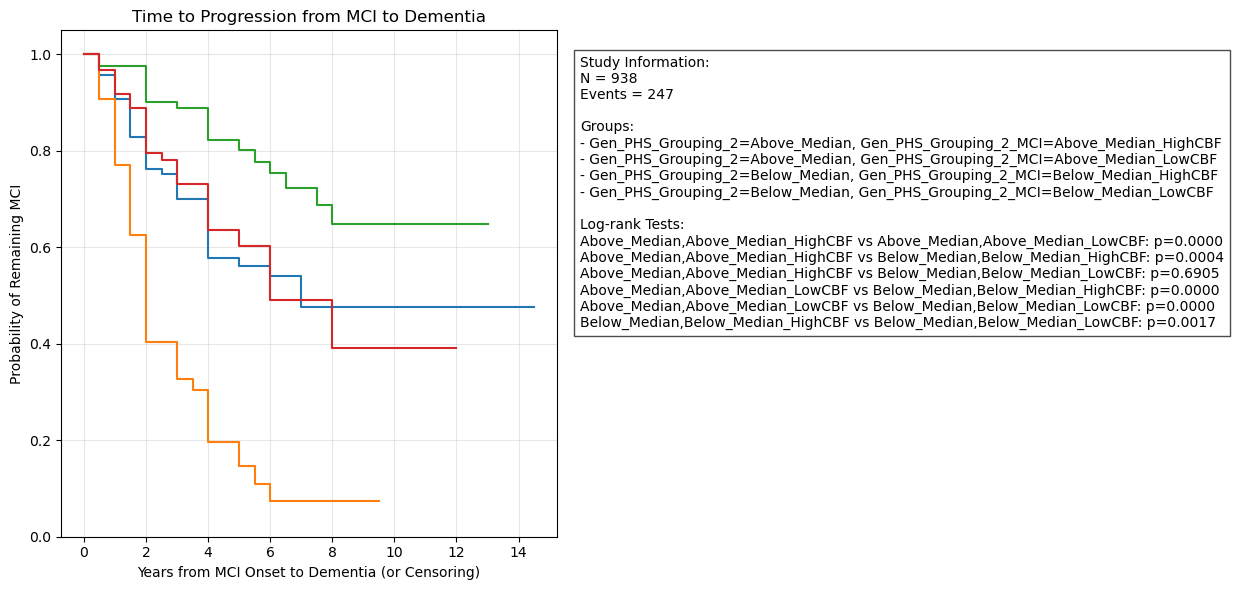

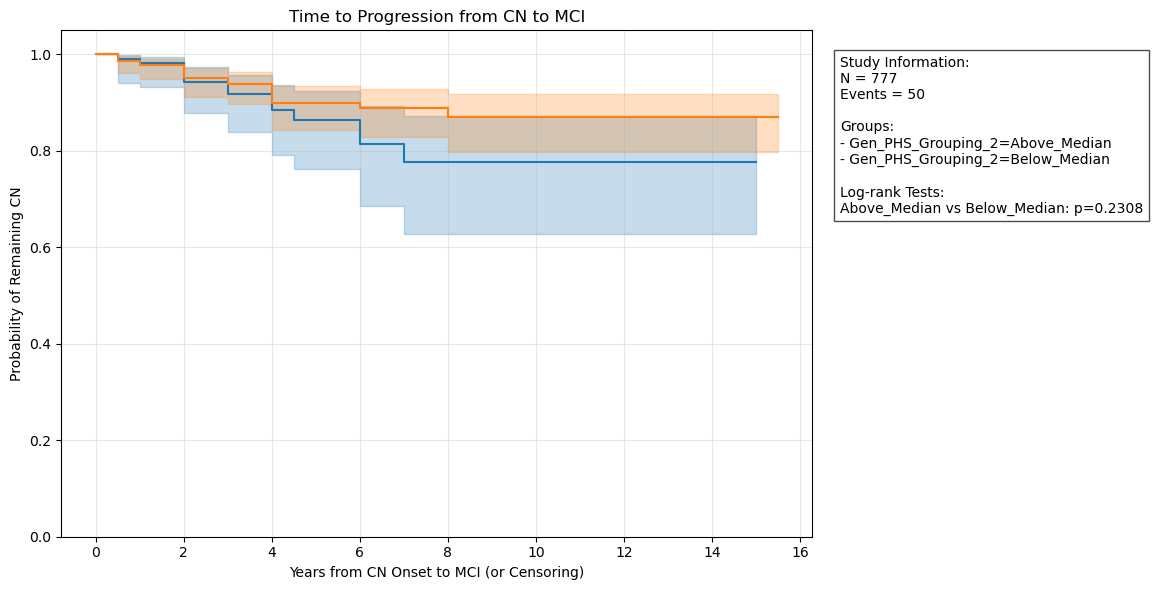

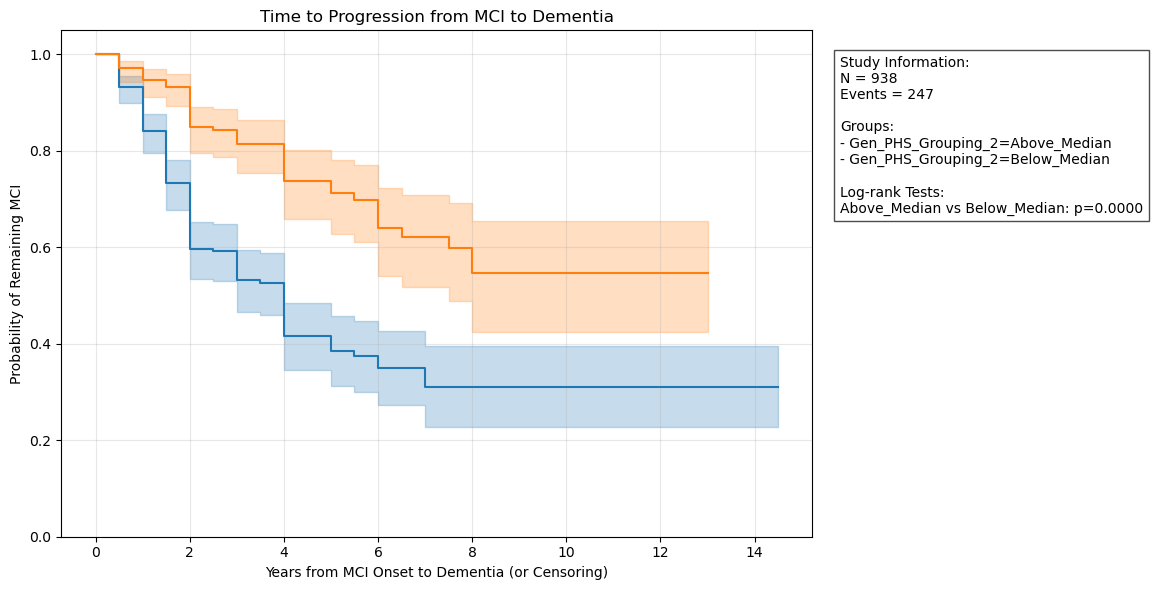

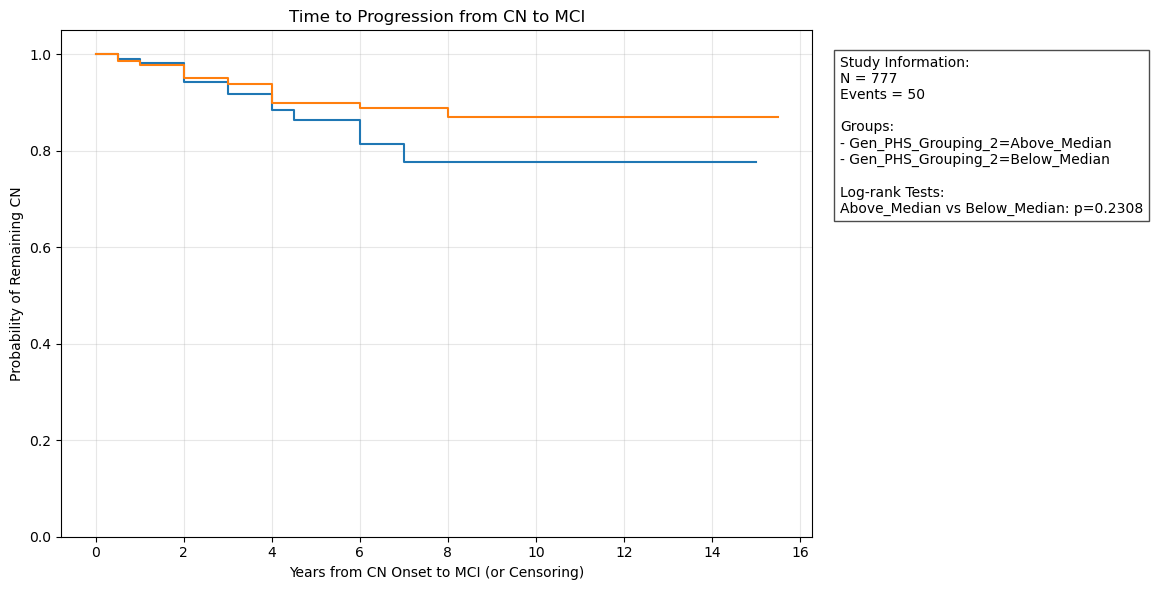

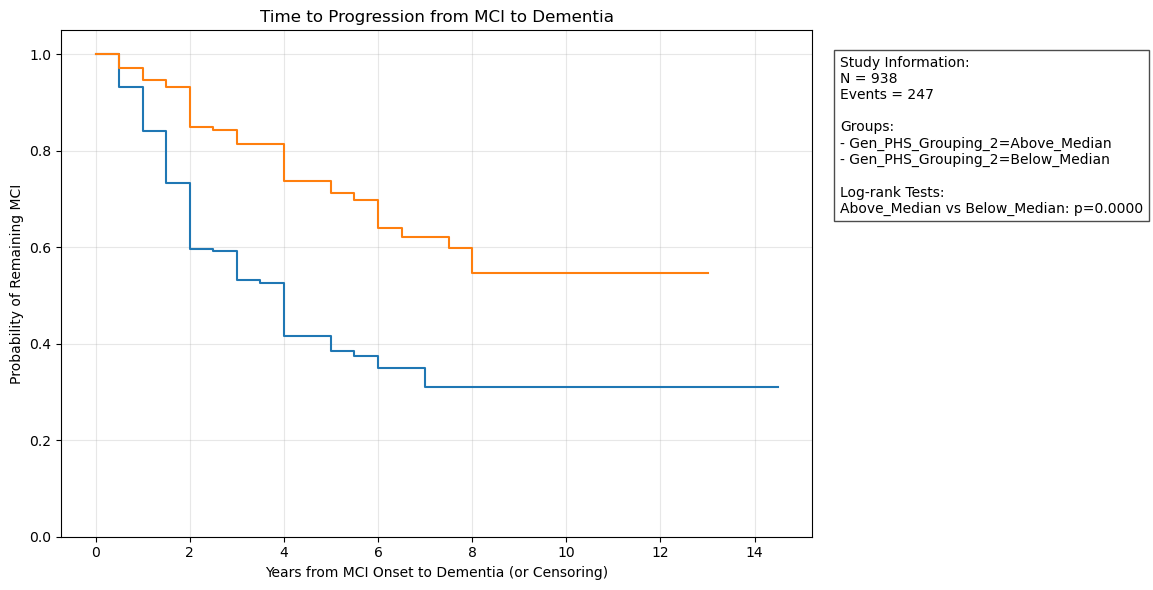

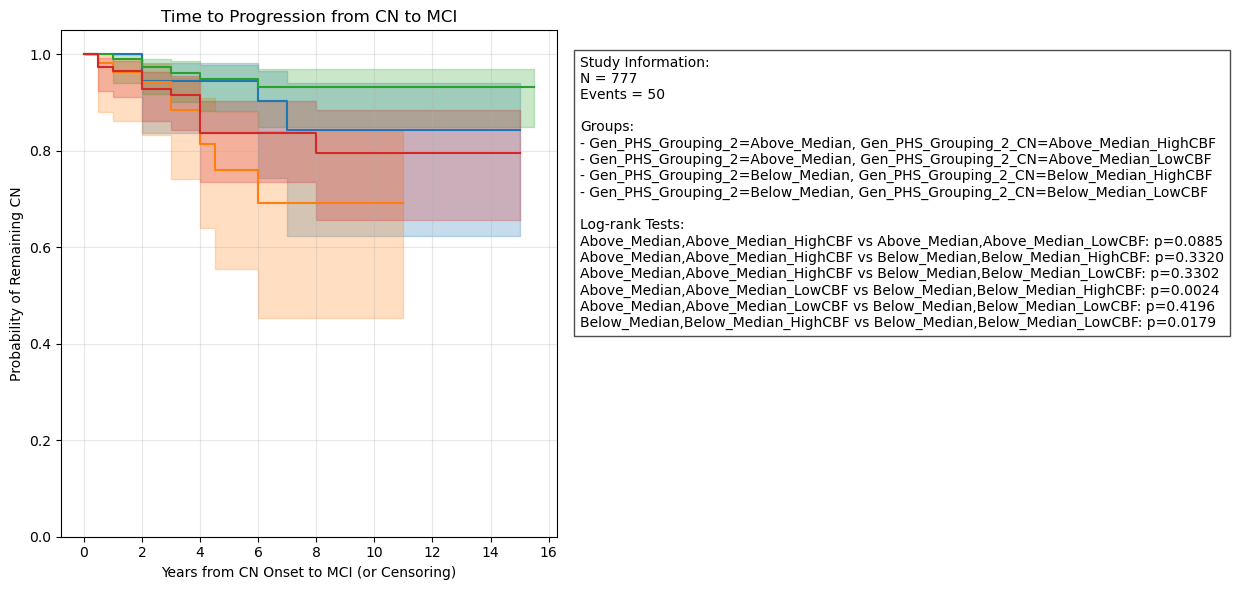

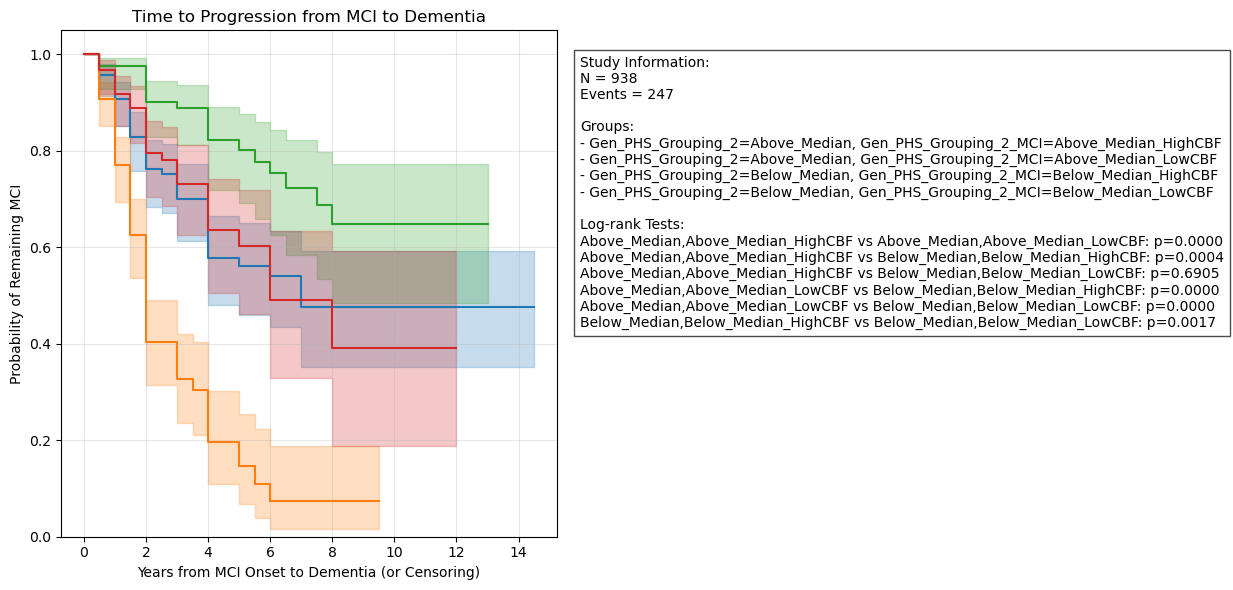

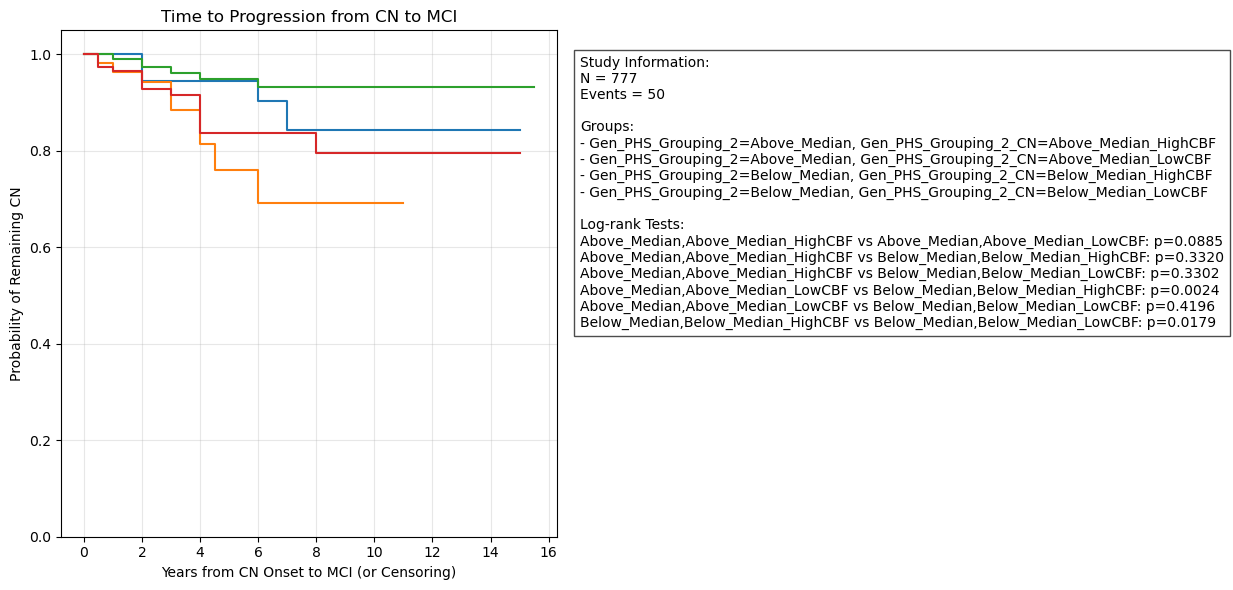

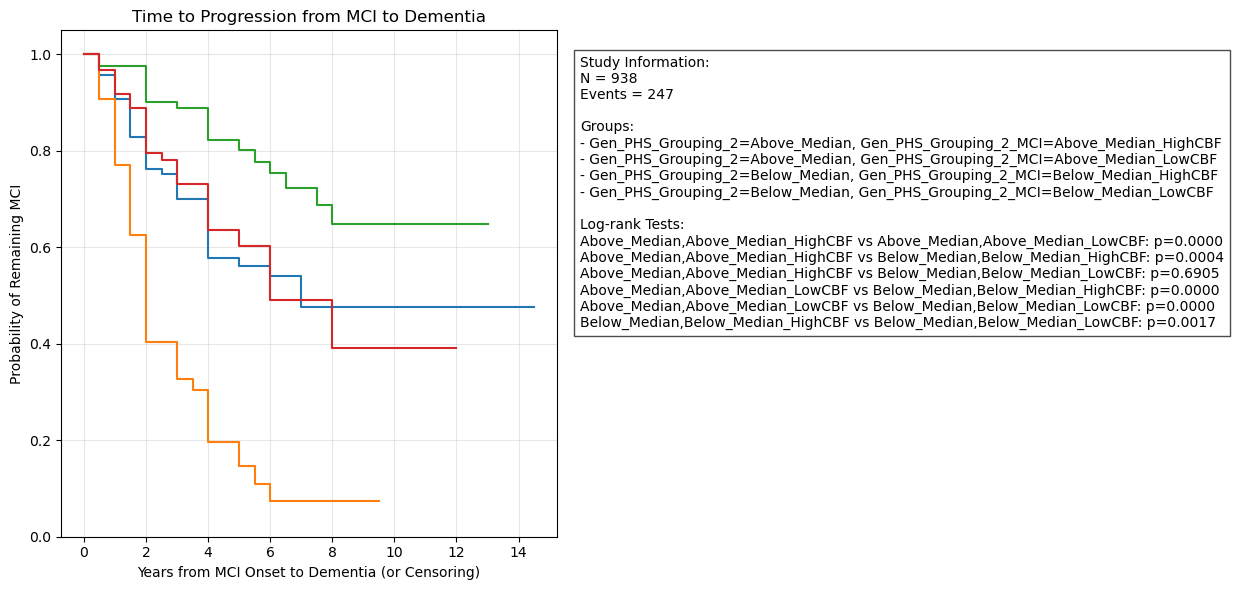

In [18]:
def plot_disease_progression_survival(df, OnsetDiag1, OnsetDiag2, GroupingVar1=None, GroupingVar2=None, show_ci=True):
    """
    Plots Kaplan-Meier survival curves for time from first diagnosis to second diagnosis,
    with time displayed in years instead of months.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Dataframe containing RID, DX, and onset columns
    OnsetDiag1 : str
        Column name for the onset time of the first diagnosis (e.g., 'CNonset')
    OnsetDiag2 : str
        Column name for the onset time of the second diagnosis (e.g., 'MCIonset')
    GroupingVar1 : str, optional
        Column name to use for first grouping variable
    GroupingVar2 : str, optional
        Column name to use for second grouping variable
    show_ci : bool, optional
        Whether to show confidence intervals on the plot (default: True)
    
    Returns:
    --------
    matplotlib.figure.Figure
        The figure containing the survival plots
    """
    
    from lifelines import KaplanMeierFitter
    from lifelines.statistics import logrank_test

    # Make a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()
    
    # Extract diagnosis names from onset column names for labeling
    diag1_name = OnsetDiag1.replace('onset', '')
    diag2_name = OnsetDiag2.replace('onset', '')
    
    # Prepare survival analysis data
    survival_data = []
    
    # Get unique subjects
    unique_subjects = df_copy['RID'].unique()
    
    for subject in unique_subjects:
        subject_data = df_copy[df_copy['RID'] == subject].reset_index(drop=True)
        
        # Check if subject has the first diagnosis
        if not pd.isna(subject_data[OnsetDiag1].iloc[0]):
            # Get first diagnosis onset time
            diag1_onset = subject_data[OnsetDiag1].iloc[0]
            
            # Get second diagnosis onset time (if it exists)
            diag2_onset = subject_data[OnsetDiag2].iloc[0]
            
            # Calculate time to event or censoring
            if not pd.isna(diag2_onset) and diag2_onset > diag1_onset:
                # Time to progression (event)
                time = diag2_onset - diag1_onset
                event = 1  # Event occurred
            else:
                # Subject did not progress to second diagnosis during follow-up
                # Use the last observed time point as censoring time
                last_visit = subject_data['Months'].max()
                time = last_visit - diag1_onset
                event = 0  # Censored
            
            # Convert time from months to years
            time_years = time / 12.0
            
            # Create data record with grouping variables
            record = {
                'RID': subject,
                'time': time_years if time_years > 0 else 0,  # Ensure non-negative time
                'event': event
            }
            
            # Add grouping variables only if they are provided
            if GroupingVar1 is not None and GroupingVar1 in subject_data.columns:
                record['group1'] = subject_data[GroupingVar1].iloc[0]
            
            if GroupingVar2 is not None and GroupingVar2 in subject_data.columns:
                record['group2'] = subject_data[GroupingVar2].iloc[0]
            
            # Add to survival data
            survival_data.append(record)
    
    # Convert to DataFrame
    survival_df = pd.DataFrame(survival_data)
    
    # Create figure with two subplots side by side
    fig, (ax, text_ax) = plt.subplots(1, 2, figsize=(12, 6), 
                                      gridspec_kw={'width_ratios': [3, 1]})
    
    # Hide axes for text subplot
    text_ax.axis('off')
    
    # Initialize KaplanMeierFitter
    kmf = KaplanMeierFitter()
    
    # Store group information and log-rank results
    group_labels = []
    log_rank_results = []
    
    # Plot based on grouping variables
    if GroupingVar1 is not None and 'group1' in survival_df.columns:
        if GroupingVar2 is not None and 'group2' in survival_df.columns:
            # Plot by both grouping variables
            group1_values = sorted([g for g in survival_df['group1'].unique() if not pd.isna(g)])
            group2_values = sorted([g for g in survival_df['group2'].unique() if not pd.isna(g)])
            
            # Create combined group labels and masks
            combined_groups = []
            
            for g1 in group1_values:
                for g2 in group2_values:
                    mask = (survival_df['group1'] == g1) & (survival_df['group2'] == g2)
                    if sum(mask) > 0:
                        label = f"{GroupingVar1}={g1}, {GroupingVar2}={g2}"
                        combined_groups.append((g1, g2, label, mask))
                        kmf.fit(survival_df[mask]['time'], survival_df[mask]['event'], label=label)
                        kmf.plot(ax=ax, ci_show=show_ci)
                        group_labels.append(label)
            
            # Log-rank tests between combined groups
            if len(combined_groups) >= 2:
                for i, (g1a, g2a, label_a, mask_a) in enumerate(combined_groups):
                    for (g1b, g2b, label_b, mask_b) in combined_groups[i+1:]:
                        if sum(mask_a) > 0 and sum(mask_b) > 0:
                            result = logrank_test(
                                survival_df[mask_a]['time'], 
                                survival_df[mask_b]['time'],
                                survival_df[mask_a]['event'], 
                                survival_df[mask_b]['event']
                            )
                            # Create abbreviated labels if too long
                            label_a_short = f"{g1a},{g2a}"
                            label_b_short = f"{g1b},{g2b}"
                            log_rank_results.append(f"{label_a_short} vs {label_b_short}: p={result.p_value:.4f}")
        else:
            # Plot by first grouping variable only
            groups = sorted([g for g in survival_df['group1'].unique() if not pd.isna(g)])
            
            for group in groups:
                mask = survival_df['group1'] == group
                if sum(mask) > 0:
                    label = f"{GroupingVar1}={group}"
                    kmf.fit(survival_df[mask]['time'], survival_df[mask]['event'], label=label)
                    kmf.plot(ax=ax, ci_show=show_ci)
                    group_labels.append(label)
            
            # Log-rank test if more than one group
            if len(groups) >= 2:
                for i, group1 in enumerate(groups):
                    for group2 in groups[i+1:]:
                        mask1 = survival_df['group1'] == group1
                        mask2 = survival_df['group1'] == group2
                        
                        if sum(mask1) > 0 and sum(mask2) > 0:
                            result = logrank_test(
                                survival_df[mask1]['time'], 
                                survival_df[mask2]['time'],
                                survival_df[mask1]['event'], 
                                survival_df[mask2]['event']
                            )
                            log_rank_results.append(f"{group1} vs {group2}: p={result.p_value:.4f}")
    else:
        # Plot overall survival without grouping
        kmf.fit(survival_df['time'], survival_df['event'], label="Overall")
        kmf.plot(ax=ax, ci_show=show_ci)
        group_labels.append("Overall")
    
    # Customize main plot
    ax.set_xlabel(f'Years from {diag1_name} Onset to {diag2_name} (or Censoring)')
    ax.set_ylabel(f'Probability of Remaining {diag1_name}')
    ax.set_title(f'Time to Progression from {diag1_name} to {diag2_name}')
    ax.grid(alpha=0.3)
    ax.set_ylim(0, 1.05)
    
    # Remove legend from the main plot
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    
    # Prepare text content for the side panel
    n_subjects = len(survival_df)
    n_events = sum(survival_df['event'])
    
    text_content = [
        "Study Information:",
        f"N = {n_subjects}",
        f"Events = {n_events}",
        "\nGroups:"
    ]
    
    # Add list of groups
    for label in group_labels:
        text_content.append(f"- {label}")
    
    # Add log-rank results if available
    if log_rank_results:
        text_content.append("\nLog-rank Tests:")
        text_content.extend(log_rank_results)
    
    # Display the text
    text_ax.text(0.05, 0.95, "\n".join(text_content), 
                 va='top', ha='left', fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.7))
    
    # Add a debugging print statement
    print(f"Number of log-rank results: {len(log_rank_results)}")
    
    plt.tight_layout()
    
    return fig

# Example usage:
# No grouping
# plot_disease_progression_survival(df, 'CNonset', 'MCIonset')

# One grouping variable
plot_disease_progression_survival(df_cbf_logical, 'CNonset', 'MCIonset', 'Gen_PHS_Grouping_2', show_ci=True)
plot_disease_progression_survival(df_cbf_logical, 'MCIonset', 'Dementiaonset', 'Gen_PHS_Grouping_2', show_ci=True)
plot_disease_progression_survival(df_cbf_logical, 'CNonset', 'MCIonset', 'Gen_PHS_Grouping_2', show_ci=False)
plot_disease_progression_survival(df_cbf_logical, 'MCIonset', 'Dementiaonset', 'Gen_PHS_Grouping_2', show_ci=False)

# Two grouping variables
plot_disease_progression_survival(df_cbf_logical, 'CNonset', 'MCIonset', 'Gen_PHS_Grouping_2','Gen_PHS_Grouping_2_CN', show_ci=True)
plot_disease_progression_survival(df_cbf_logical, 'MCIonset', 'Dementiaonset', 'Gen_PHS_Grouping_2','Gen_PHS_Grouping_2_MCI', show_ci=True)
plot_disease_progression_survival(df_cbf_logical, 'CNonset', 'MCIonset', 'Gen_PHS_Grouping_2','Gen_PHS_Grouping_2_CN', show_ci=False)
plot_disease_progression_survival(df_cbf_logical, 'MCIonset', 'Dementiaonset', 'Gen_PHS_Grouping_2','Gen_PHS_Grouping_2_MCI', show_ci=False)

# For CN to MCI progression:
# plot_disease_progression_survival(df_filtered, 'CNonset', 'MCIonset', 'AGE_Med')
# 
# For MCI to Dementia progression:
# plot_disease_progression_survival(df_filtered, 'MCIonset', 'Dementiaonset', 'GENDER', 'AGE_Med')

C:\Users\Sarah\AppData\Local\Temp\ipykernel_10116\2907755975.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prog_data['YearBin'] = np.round(prog_data[time_column] * 2) / 2
C:\Users\Sarah\AppData\Local\Temp\ipykernel_10116\2907755975.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prog_data['YearBin'] = np.round(prog_data[time_column] * 2) / 2
C:\Users\Sarah\AppData\Local\Temp\ipykernel_10116\2907755975.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

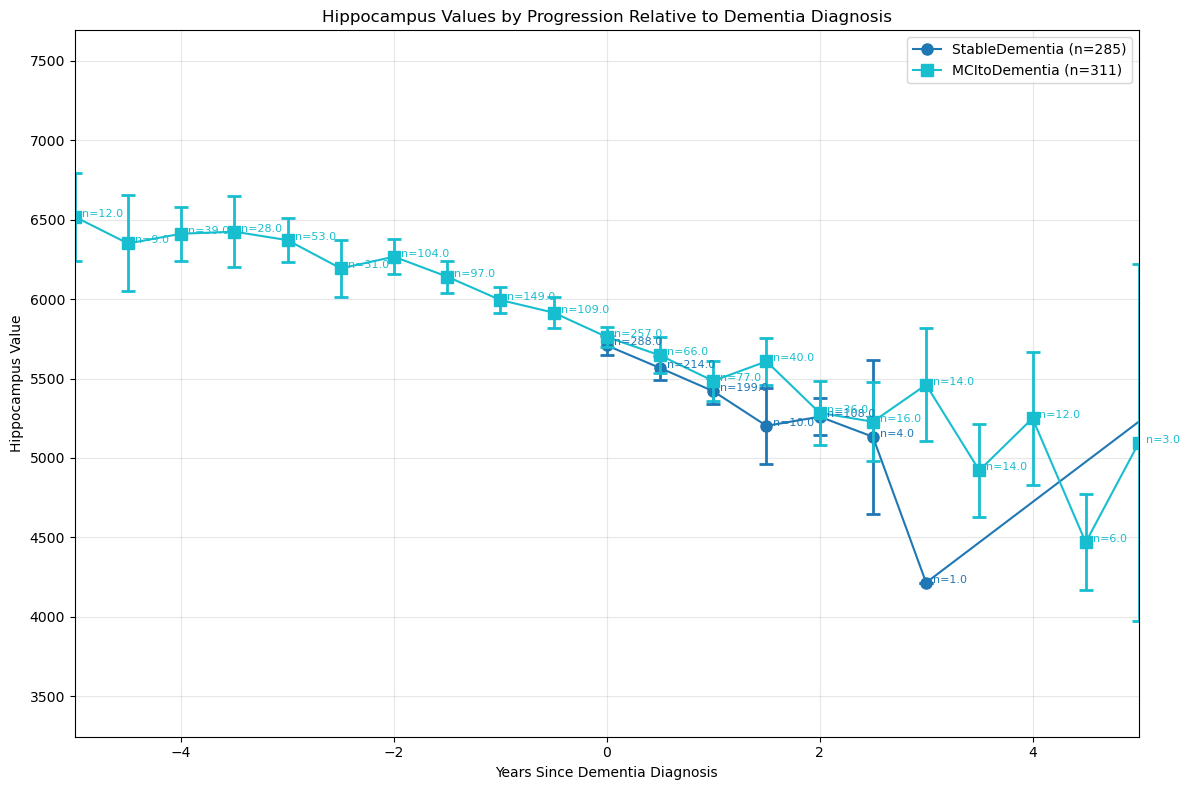

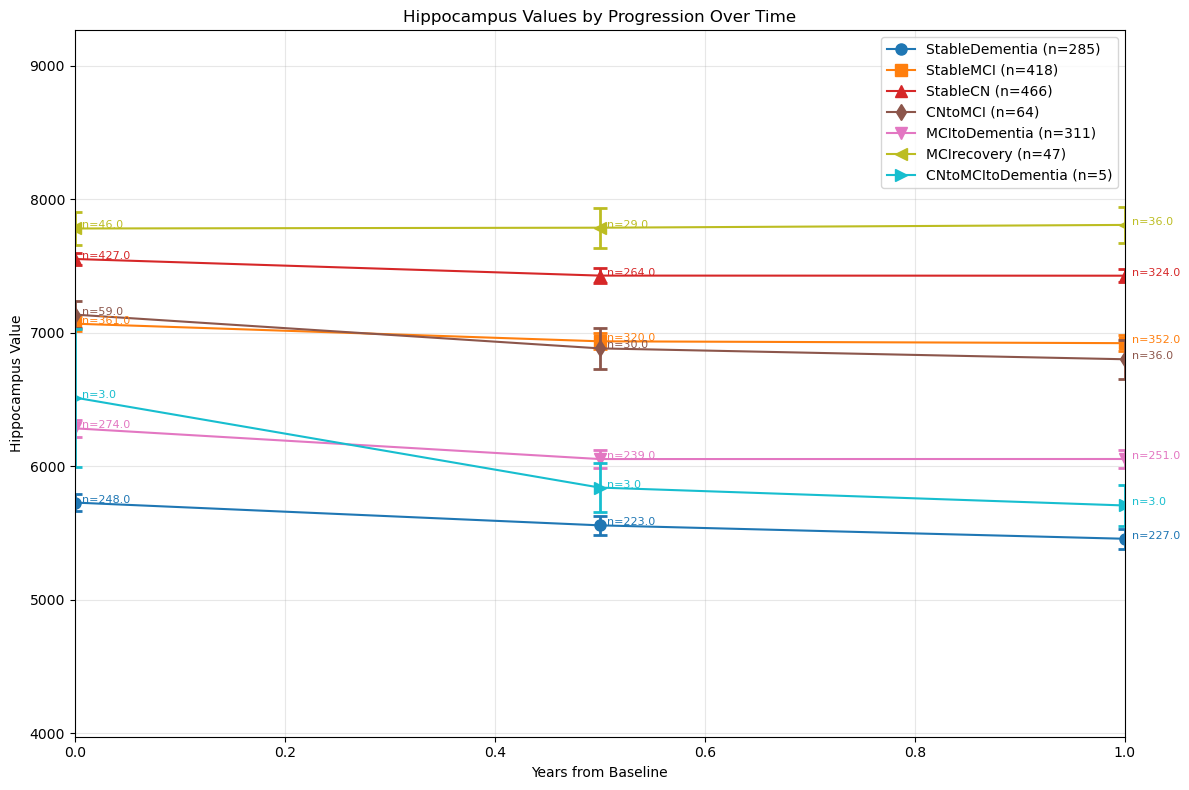

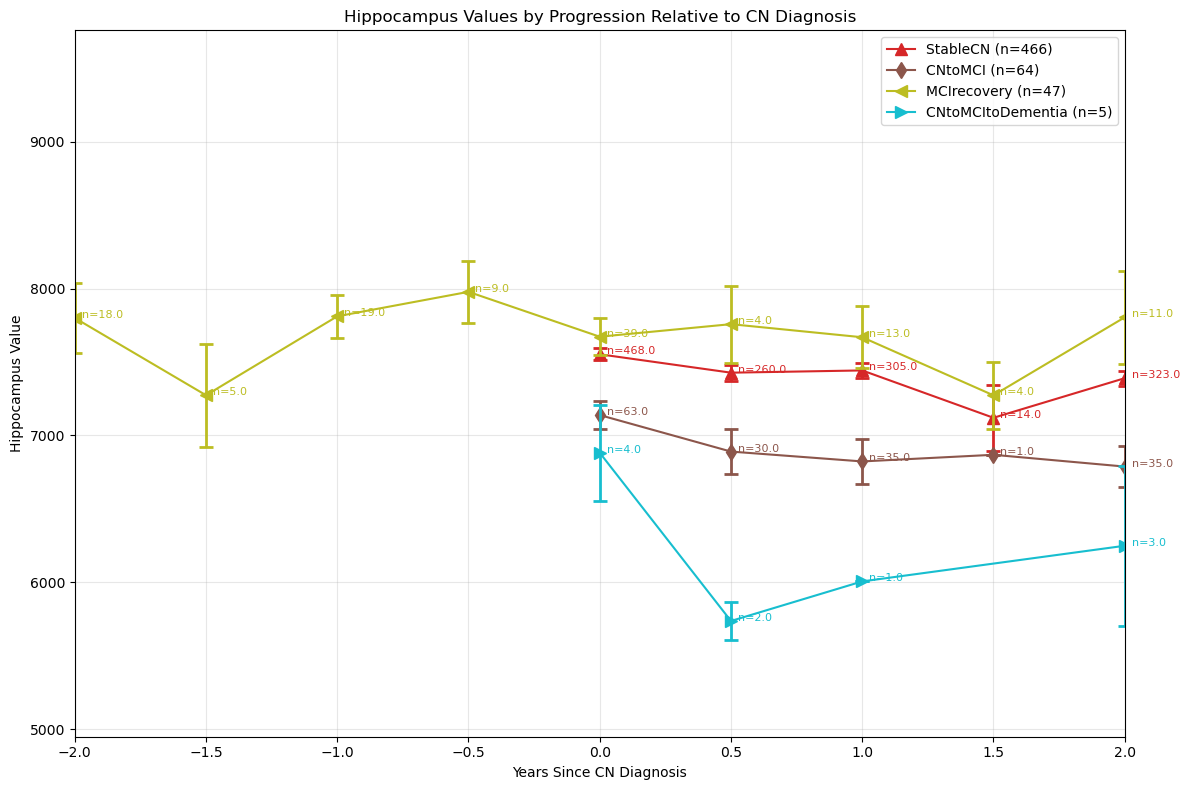

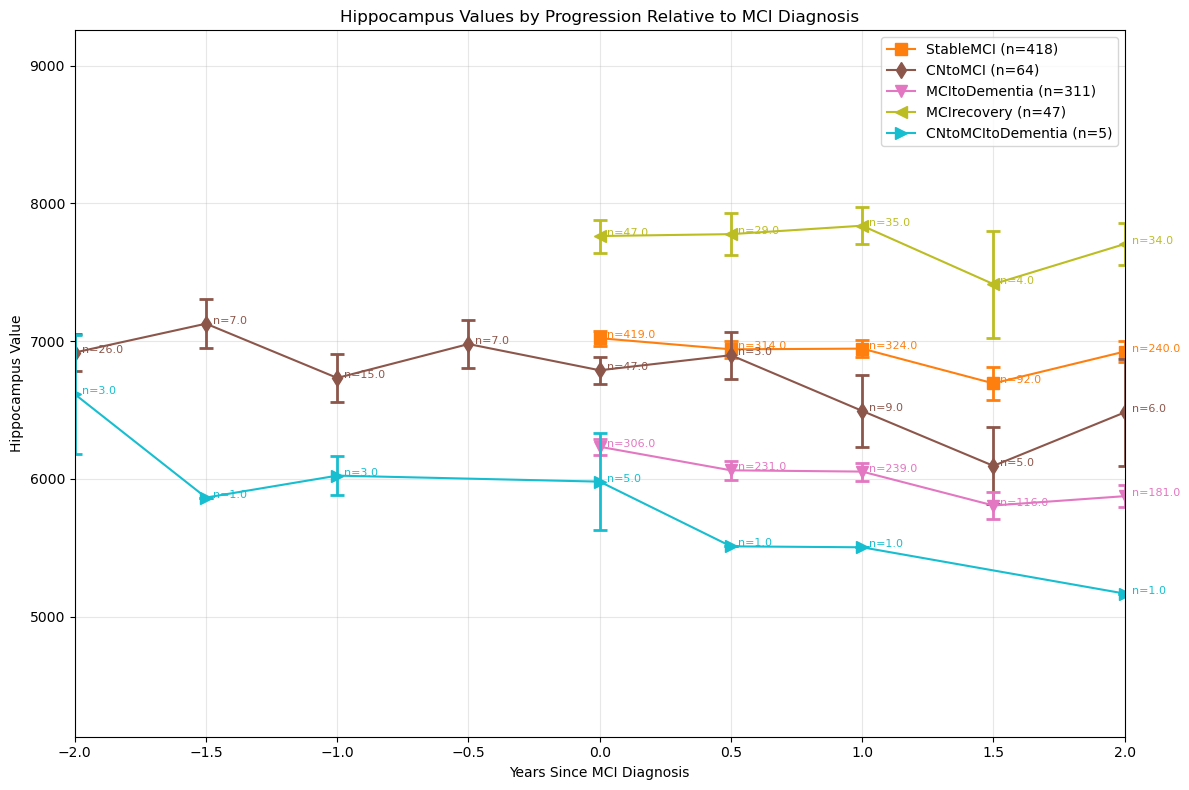

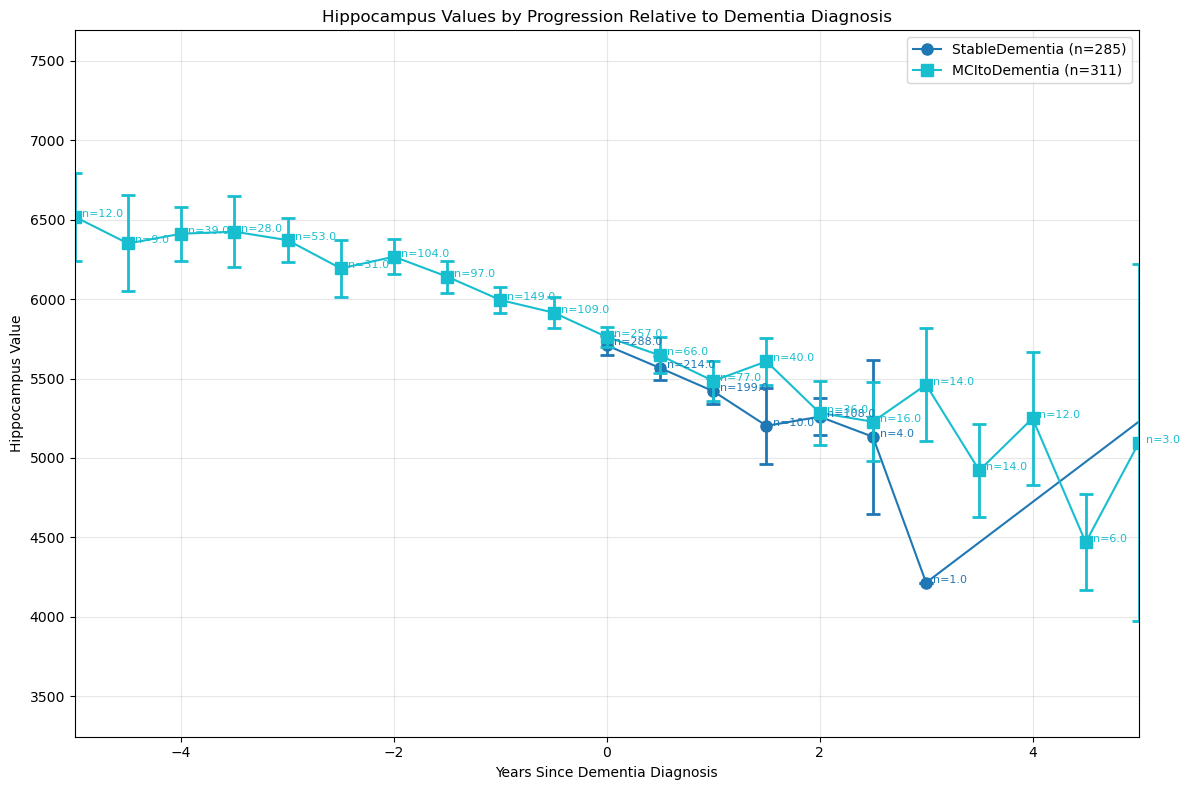

In [19]:
# Plot blood flow progression over time
# Excludes "Insufficient" group, where they have fewer than 3 consecutive diagnoses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def plot_cbf_progression_over_time(df, cbf_column='Hippocampus', relative_to=None, 
                                  xlim=None, ylim=None, progression_groups=None):
    """
    Plots blood flow values over time as connected points with standard error bars.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Dataframe containing RID, Months, Progression, and blood flow data
    cbf_column : str, optional
        Name of the column containing blood flow data (default: 'Hippocampus')
    relative_to : str, optional
        Reference point for time axis: None (use raw Months), 'CN', 'MCI', or 'Dementia'
    xlim : tuple, optional
        Custom x-axis limits as (min, max) in years
    ylim : tuple, optional
        Custom y-axis limits as (min, max)
    progression_groups : list, optional
        List of progression types to include (default: all in dataframe except 'Insufficient')
    
    Returns:
    --------
    matplotlib.figure.Figure
        The figure containing the plot
    """
    # Make a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()
    
    # Check for required columns
    required_cols = ['RID', 'Months', 'Progression', cbf_column]
    if relative_to:
        required_cols.append(f"{relative_to}onset")
    
    missing_cols = [col for col in required_cols if col not in df_copy.columns]
    if missing_cols:
        raise ValueError(f"Missing required columns: {missing_cols}")
    
    # Create adjusted time variable based on relative_to parameter
    if relative_to:
        onset_col = f"{relative_to}onset"
        df_copy['AdjustedMonths'] = np.nan
        
        # Calculate months relative to onset for each subject
        for subject in df_copy['RID'].unique():
            subject_mask = df_copy['RID'] == subject
            if len(df_copy.loc[subject_mask]) > 0:  # Ensure we have data for this subject
                onset_value = df_copy.loc[subject_mask, onset_col].iloc[0]
                
                if not pd.isna(onset_value):
                    df_copy.loc[subject_mask, 'AdjustedMonths'] = df_copy.loc[subject_mask, 'Months'] - onset_value
        
        time_column = 'AdjustedMonths'
        x_label = f"Years Since {relative_to} Diagnosis"
    else:
        time_column = 'Months'
        x_label = "Years from Baseline"
    
    # Convert months to years for plotting
    df_copy['Years'] = df_copy[time_column] / 12.0
    time_column = 'Years'
    
    # Exclude 'Insufficient' progression group and filter by progression groups if specified
    df_copy = df_copy[df_copy['Progression'] != 'Insufficient']
    
    if progression_groups:
        df_copy = df_copy[df_copy['Progression'].isin(progression_groups)]
    
    # Get unique progression types
    unique_progressions = df_copy['Progression'].dropna().unique()
    
    # Set up color cycle and markers
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_progressions)))
    markers = ['o', 's', '^', 'd', 'v', '<', '>', 'p', '*', 'h']
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Track all plotted data for legend
    legend_handles = []
    legend_labels = []
    
    # Process each progression group
    for i, progression in enumerate(unique_progressions):
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        
        # Filter data for this progression group
        prog_mask = df_copy['Progression'] == progression
        prog_data = df_copy[prog_mask]
        
        # Skip if no valid data for this progression
        if len(prog_data) == 0 or prog_data[time_column].isna().all():
            continue
            
        # Group data by time points and calculate statistics
        grouped_data = []
        
        # Use bins for years to group similar timepoints
        # Round to nearest 0.5 years to create bins
        prog_data['YearBin'] = np.round(prog_data[time_column] * 2) / 2
        
        # Find common time points (bins)
        time_points = prog_data['YearBin'].dropna().unique()
        time_points = sorted(time_points)
        
        for time_point in time_points:
            time_mask = prog_data['YearBin'] == time_point
            cbf_values = prog_data.loc[time_mask, cbf_column].dropna()
            
            if len(cbf_values) > 0:
                mean_cbf = cbf_values.mean()
                sem_cbf = stats.sem(cbf_values) if len(cbf_values) > 1 else 0
                n_subjects = len(cbf_values)
                
                grouped_data.append({
                    'time': time_point,
                    'mean': mean_cbf,
                    'sem': sem_cbf,
                    'n': n_subjects
                })
        
        # Convert to DataFrame for easier plotting
        if grouped_data:
            plot_df = pd.DataFrame(grouped_data)
            
            # Plot mean values as connected points
            line = ax.plot(plot_df['time'], plot_df['mean'], 
                         marker=marker, color=color, 
                         linestyle='-', markersize=8, label=progression)
            
            # Add error bars
            ax.errorbar(plot_df['time'], plot_df['mean'], 
                      yerr=plot_df['sem'], color=color, 
                      linestyle='none', capsize=5, capthick=2, elinewidth=2)
            
            # Add sample size as text next to points
            for idx, row in plot_df.iterrows():
                ax.annotate(f"n={row['n']}", 
                          xy=(row['time'], row['mean']), 
                          xytext=(5, 0), textcoords='offset points',
                          color=color, fontsize=8)
            
            # Total unique subjects in this progression group
            total_subjects = len(prog_data['RID'].unique())
            
            legend_handles.append(line[0])
            legend_labels.append(f"{progression} (n={total_subjects})")
    
    # Set axis labels and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(f"{cbf_column} Value")
    
    if relative_to:
        title = f"{cbf_column} Values by Progression Relative to {relative_to} Diagnosis"
    else:
        title = f"{cbf_column} Values by Progression Over Time"
    
    ax.set_title(title)
    
    # Set custom axis limits if provided
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Add legend with custom labels that include sample size
    ax.legend(legend_handles, legend_labels, loc='best')
    
    plt.tight_layout()
    
    return fig

# Example usage:
# Plot against raw years
# plot_cbf_progression_over_time(df_filtered, xlim=(-0.5, 5))

# Plot relative to CN diagnosis
# plot_cbf_progression_over_time(df_filtered, relative_to='CN', xlim=(-1, 5))

# Plot only certain progression groups
# groups_to_plot = ['StableCN', 'CNtoMCI', 'StableMCI']
# plot_cbf_progression_over_time(df_filtered, relative_to='MCI', progression_groups=groups_to_plot)

# Example usage:
# Plot against raw months
plot_cbf_progression_over_time(df_cbf, xlim=(0,1))

# Plot relative to diagnosis
plot_cbf_progression_over_time(df_cbf, relative_to='CN', xlim=(-2, 2))
plot_cbf_progression_over_time(df_cbf, relative_to='MCI', xlim=(-2, 2))
# plot_cbf_progression_over_time(df_cbf, relative_to='Dementia', xlim=(-2, 2))

# Plot only certain progression groups
groups_to_plot = ['MCItoDementia', 'StableDementia']
plot_cbf_progression_over_time(df_cbf, relative_to='Dementia', progression_groups=groups_to_plot, xlim=(-5, 5))

In [42]:
# df_filtered, df_cbf, df_cbf_logical
print('df_filtered')
print(df_filtered['RID'].nunique())
print(df_filtered['DX'].value_counts())
print('df_cbf')
print(df_cbf['RID'].nunique())
print(df_cbf['DX'].value_counts())
progression_counts = df_cbf.groupby('Progression')['RID'].nunique().sort_values(ascending=False)
print("Number of unique subjects in each progression group:")
print(progression_counts)


df_filtered
2231
DX
MCI         4225
CN          3447
Dementia    2230
Name: count, dtype: int64
df_cbf
2095
DX
MCI         3068
CN          2595
Dementia    1491
Name: count, dtype: int64
Number of unique subjects in each progression group:
Progression
StableCN             466
StableMCI            418
MCItoDementia        311
StableDementia       285
Insufficient         236
CNtoMCI               64
MCIrecovery           47
CNtoMCItoDementia      5
Name: RID, dtype: int64
